<a href="https://colab.research.google.com/github/jasmine400/nlp-/blob/main/arabic_bert_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install torch

In [ ]:
pip install -U sentence-transformers

     |████████████████████████████████| 79 kB 5.1 MB/s 
     |████████████████████████████████| 3.5 MB 19.2 MB/s 
     |████████████████████████████████| 1.2 MB 48.0 MB/s 
     |████████████████████████████████| 67 kB 6.1 MB/s 
     |████████████████████████████████| 596 kB 62.1 MB/s 
     |████████████████████████████████| 895 kB 50.3 MB/s 
     |████████████████████████████████| 6.5 MB 45.5 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.0-py3-none-any.whl size=120747 sha256=3169c46056a8490bd0c528cd71c1c7a411bf009c07a624697bcb0c6481b2be6d
  Stored in directory: /root/.cache/pip/wheels/83/c0/df/b6873ab7aac3f2465aa9144b6b4c41c4391cfecc027c8b07e7
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
sentences = ['This framework generates embeddings for each input sentence',
    'Sentences are passed as a list of string.',
    'The quick brown fox jumps over the lazy dog.',
    'The quick brown fox jumps over the lazy dog.']
sentence_embeddings = model.encode(sentences)

In [ ]:
print(type(sentence_embeddings))

<class 'numpy.ndarray'>


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
cosine_sim = cosine_similarity(sentence_embeddings)

In [ ]:
print(cosine_sim)

[[1.0000001  0.5380795  0.11805632 0.11805632]
 [0.5380795  0.9999999  0.10358982 0.10358982]
 [0.11805632 0.10358982 0.9999999  0.9999999 ]
 [0.11805632 0.10358982 0.9999999  0.9999999 ]]


In [ ]:
print(type(cosine_sim))

<class 'numpy.ndarray'>


In [ ]:
for sentence, embedding in zip(sentences, sentence_embeddings):
    print("Sentence:", sentence)
    print("Embedding:", embedding)
    print("")

Sentence: This framework generates embeddings for each input sentence
Embedding: [-1.37173692e-02 -4.28515971e-02 -1.56286005e-02  1.40537340e-02
  3.95537987e-02  1.21796280e-01  2.94333026e-02 -3.17523628e-02
  3.54960226e-02 -7.93140456e-02  1.75878387e-02 -4.04368937e-02
  4.97259572e-02  2.54913066e-02 -7.18700513e-02  8.14968124e-02
  1.47065916e-03  4.79627512e-02 -4.50335816e-02 -9.92174000e-02
 -2.81769354e-02  6.45045266e-02  4.44670543e-02 -4.76217270e-02
 -3.52951847e-02  4.38672118e-02 -5.28566055e-02  4.33009292e-04
  1.01921462e-01  1.64072886e-02  3.26996818e-02 -3.45987007e-02
  1.21339653e-02  7.94871151e-02  4.58343094e-03  1.57778542e-02
 -9.68205277e-03  2.87626497e-02 -5.05806655e-02 -1.55794006e-02
 -2.87907533e-02 -9.62284207e-03  3.15556563e-02  2.27349419e-02
  8.71450156e-02 -3.85027565e-02 -8.84718150e-02 -8.75499099e-03
 -2.12343633e-02  2.08924152e-02 -9.02078301e-02 -5.25732115e-02
 -1.05638588e-02  2.88311299e-02 -1.61454938e-02  6.17827754e-03
 -1.23234

In [ ]:
"""
This is a simple application for sentence embeddings: clustering
Sentences are mapped to sentence embeddings and then k-mean clustering is applied.
"""
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans

embedder = SentenceTransformer('all-MiniLM-L6-v2')

# Corpus with example sentences
corpus = ['A man is eating food.',
          'A man is riding a horse.',
          'A man is eating pasta.',
          'The girl is carrying a baby.',
          'The baby is carried by the woman',
          'A man is eating a piece of bread.',
          'A man is riding a white horse on an enclosed ground.',
          'A monkey is playing drums.',
          'Someone in a gorilla costume is playing a set of drums.',
          'A cheetah is running behind its prey.',
          'A cheetah chases prey on across a field.'
          ]
corpus_embeddings = embedder.encode(corpus)
print(corpus_embeddings)
print(type(corpus_embeddings))
corpus_embeddings.shape
# # Perform kmean clustering
# num_clusters = 5
# clustering_model = KMeans(n_clusters=num_clusters)
# clustering_model.fit(corpus_embeddings)
# cluster_assignment = clustering_model.labels_
# a=[]
# clustered_sentences = [[] for i in range(num_clusters)]
# for sentence_id, cluster_id in enumerate(cluster_assignment):
#     clustered_sentences[cluster_id].append(corpus[sentence_id])
#     a.append(cluster_id)
# print(a)

# for i, cluster in enumerate(clustered_sentences):
#     print("Cluster ", i+1)
#     print(cluster)
#     print("")

[[ 0.03324159  0.00440609 -0.00627701 ...  0.069173   -0.02458485
  -0.03756436]
 [-0.00462489 -0.01413285  0.04100324 ...  0.00743567  0.06817718
  -0.02425218]
 [-0.0115815  -0.05081131 -0.02168632 ...  0.0821645   0.00986631
  -0.03942106]
 ...
 [-0.03571456  0.01683481  0.04483475 ...  0.02489528  0.06529622
  -0.01124187]
 [ 0.02284905  0.10405442 -0.03396691 ...  0.00290547  0.03857747
   0.04375297]
 [ 0.05438589  0.05397902 -0.00367978 ...  0.03249273  0.02187709
   0.06213458]]
<class 'numpy.ndarray'>


(11, 384)

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 11)

for k in K:
	# Building and fitting the model
	kmeanModel = KMeans(n_clusters=k).fit(corpus_embeddings)
	kmeanModel.fit(corpus_embeddings)

	distortions.append(sum(np.min(cdist(corpus_embeddings, kmeanModel.cluster_centers_,
										'euclidean'), axis=1)) / corpus_embeddings.shape[0])
	inertias.append(kmeanModel.inertia_)

	mapping1[k] = sum(np.min(cdist(corpus_embeddings, kmeanModel.cluster_centers_,
								'euclidean'), axis=1)) / corpus_embeddings.shape[0]
	mapping2[k] = kmeanModel.inertia_


In [ ]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 0.8879196748814917
2 : 0.7695819887432763
3 : 0.6423487316475622
4 : 0.51971757137165
5 : 0.3858861245493341
6 : 0.32155131824419636
7 : 0.24476173045113114
8 : 0.17881436359638594
9 : 0.11522178399914829
10 : 0.05373315737587563


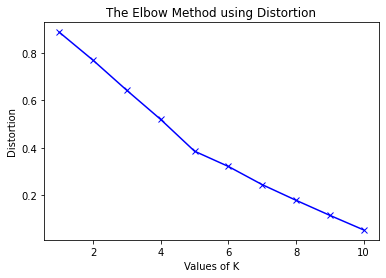

In [ ]:

plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [ ]:
!nvidia-smi

Wed Feb 16 05:04:51 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8    31W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import torch
torch.cuda.is_available()
# Output would be True if Pytorch is using GPU otherwise it would be False.

True

In [ ]:
#check if gpu is on
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f'device: {device}')

train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

device: cuda:0
CUDA is available!  Training on GPU ...


In [ ]:
#clear memory
import torch, gc

gc.collect()
torch.cuda.empty_cache()

!nvidia-smi

Wed Feb 16 05:05:11 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8    31W / 149W |      3MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------